In [148]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [149]:
training_generator = ImageDataGenerator(
    rescale = 1/255, # Normalizes pixel values from 0–255 to 0–1.
    shear_range = 0.2, #Skews the image to simulate different angles.
    zoom_range = 0.2,
    horizontal_flip = True
)


In [150]:
 # Load training images from directory
training_set = training_generator.flow_from_directory('training_data',
    target_size = (64,64), #Resizes images for consistency.
    batch_size = 32,
    class_mode = 'binary' #Treats labels as 0 or 1 for two classes.
    )

Found 612 images belonging to 2 classes.


In [151]:
# Normalizes test images (no augmentation—just clean input).
test_generator = ImageDataGenerator (rescale = 1./255)

test_set = test_generator.flow_from_directory('test_data',
target_size=(64,64),
batch_size = 32,
class_mode = 'binary')

Found 150 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'ripe_lemons': 0, 'unripe_lemons': 1}

In [153]:
cnn = tf.keras.models.Sequential()

In [154]:
# 1st Convolutional layer: Detects patterns.
cnn.add(tf.keras.layers.Conv2D(
    filters=32, # Number of feature detectors.
    kernel_size=3, #3×3 filter.
    activation='relu', #Adds non-linearity.
    input_shape=[64, 64, 3]) #For the first layer only (64×64 RGB).
)

c:\Users\sansk\Desktop\ML\virtual_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
# Reduces spatial dimensions (64x64 → 32x32), retaining key features.
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [156]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [157]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [158]:
# Converts 2D feature maps into a 1D vector for the classifier.
cnn.add(tf.keras.layers.Flatten())

In [159]:
# Prevents overfitting by randomly “dropping out” 40% of neurons during training.
cnn.add(tf.keras.layers.Dropout(0.4))

In [160]:
# Fully connected layer with 128 neurons for deep learning.
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [161]:
# Output layer: 1 neuron gives a probability between 0 and 1.
# sigmoid is perfect for binary classification.
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [162]:
cnn.compile(optimizer='adam', # Efficient gradient descent. 
loss='binary_crossentropy', # For measuring binary classification error.
metrics=['accuracy'] #Evaluates how many predictions were correct.
)

In [163]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

r=cnn.fit(x=training_set, validation_data=test_set, epochs=30, callbacks=[early_stop, reduce_lr])

Epoch 1/30


c:\Users\sansk\Desktop\ML\virtual_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5283 - loss: 0.7160 - val_accuracy: 0.7267 - val_loss: 0.6365 - learning_rate: 0.0010
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6554 - loss: 0.6130 - val_accuracy: 0.6333 - val_loss: 0.6605 - learning_rate: 0.0010
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7411 - loss: 0.5475 - val_accuracy: 0.5667 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7490 - loss: 0.5496 - val_accuracy: 0.6733 - val_loss: 0.6492 - learning_rate: 0.0010
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7849 - loss: 0.4855 - val_accuracy: 0.7000 - val_loss: 0.6414 - learning_rate: 2.0000e-04
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7900 - loss: 0.4737 - val_accuracy: 0.6800 - val_loss: 0.6356 - learning_rate: 2.0000e-04
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7931 - loss: 0.4807 - val_accura

In [164]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [165]:
image1 = image.load_img('predictions/image1.webp', target_size =(64,64))
image2 = image.load_img('predictions/image2.jpeg', target_size = (64,64))
image3 = image.load_img('predictions/image3.jpeg', target_size =(64,64))
image4 = image.load_img('predictions/image4.jpg', target_size =(64,64))
image5 = image.load_img('predictions/image5.webp', target_size =(64,64))

image6 = image.load_img('predictions/image7.jpg', target_size =(64,64))

In [166]:
image1 = image.img_to_array(image1)
image2 = image.img_to_array(image2)
image3 = image.img_to_array(image3)
image4 = image.img_to_array(image4)
image5 = image.img_to_array(image5)
image6 = image.img_to_array(image6)

In [167]:
image1 = np.expand_dims(image1 , axis = 0)
image2 = np.expand_dims(image2, axis = 0)
image3 = np.expand_dims(image3, axis = 0)
image4 = np.expand_dims(image4, axis = 0)
image5 = np.expand_dims(image5, axis = 0)
image6 = np.expand_dims(image6, axis = 0)

In [168]:
result1 = cnn.predict(image1)
result2 = cnn.predict(image2)
result3 = cnn.predict(image3)
result4 = cnn.predict(image4)
result5 = cnn.predict(image5)
result6 = cnn.predict(image6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [169]:
print(result1)
print(result2)
print(result3)
print(result4)
print(result5)
print(result6)

[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


In [170]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

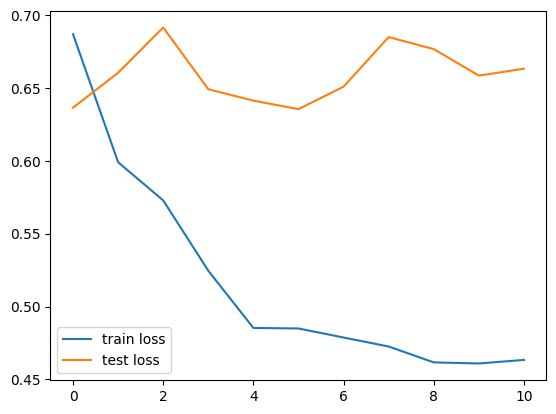

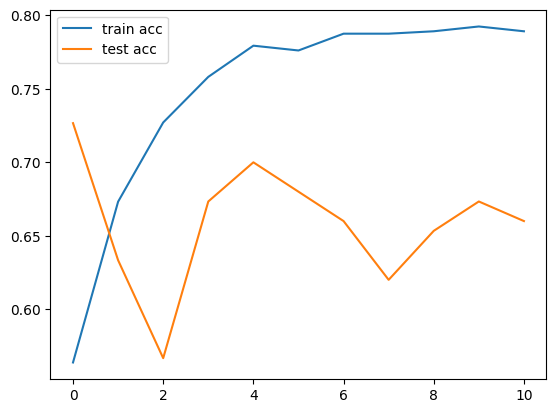

<Figure size 640x480 with 0 Axes>

In [171]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
print(r.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [183]:
from sklearn.metrics import classification_report

Y_pred=cnn.predict(test_set)
y_pred = (Y_pred > 0.5).astype("int32")

print(classification_report(test_set.classes, y_pred, target_names=['ripened', 'unripened'], zero_division=0))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

     ripened       0.51      0.58      0.55        72
   unripened       0.56      0.49      0.52        78

    accuracy                           0.53       150
   macro avg       0.54      0.54      0.53       150
weighted avg       0.54      0.53      0.53       150



In [179]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Compute confusion matrix

In [180]:
cnf_matrix=confusion_matrix(test_set.classes, y_pred)
np.set_printoptions(precision=2)

Plot non-normalized confusion matrix

Normalized confusion matrix


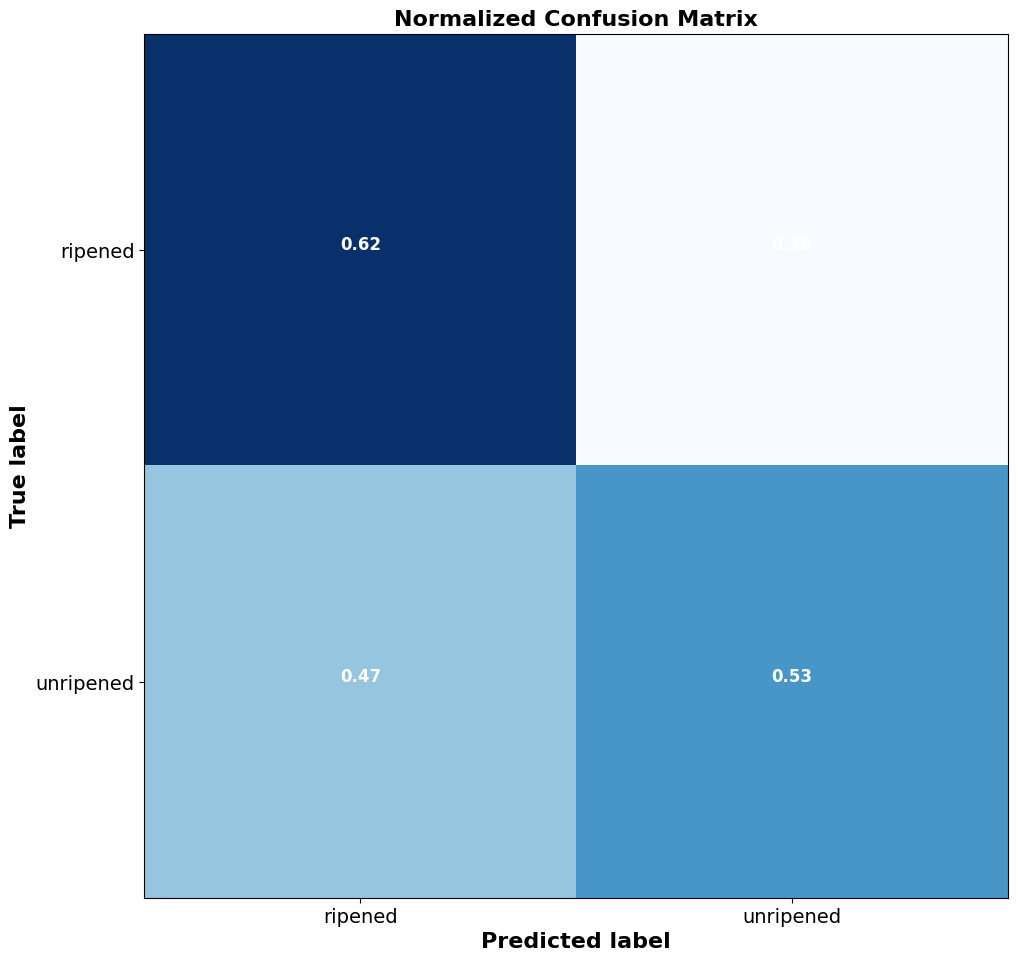

In [181]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['ripened','unripened'],normalize=True, title='Normalized Confusion Matrix')
plt.show()

In [177]:
import numpy as np
np.bincount(training_set.classes)

array([298, 314])